# Dataset Analysis

## Load datasets and show info

In [1]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/train_dataset.csv")
val_df = pd.read_csv("/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/val_dataset.csv")
test_df = pd.read_csv("/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/test_dataset.csv")

# Display basic info
print("Training Data:")
print(train_df.info())

print("\nValidation Data:")
print(val_df.info())

print("\nTest Data:")
print(test_df.info())

Training Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148388 entries, 0 to 148387
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      148388 non-null  int64 
 1   Text    148388 non-null  object
 2   Label   148388 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB
None

Validation Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42396 entries, 0 to 42395
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      42396 non-null  int64 
 1   Text    42396 non-null  object
 2   Label   42396 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 993.8+ KB
None

Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21199 entries, 0 to 21198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      21199 non-null  int64 
 1   Text    21199 non-null  object
dtypes: 

## Show the Percentage Partition of the Data

In [2]:
# Find the percentage of each dataset
train_size = train_df.shape[0]
val_size = val_df.shape[0]
test_size = test_df.shape[0]
total_size = train_size + val_size + test_size

train_percent = (train_size / total_size) * 100
val_percent = (val_size / total_size) * 100
test_percent = (test_size / total_size) * 100

print("\nPercentage of each dataset:")
print(f"Training: {train_percent:.2f}%")
print(f"Validation: {val_percent:.2f}%")
print(f"Test: {test_percent:.2f}%")


Percentage of each dataset:
Training: 70.00%
Validation: 20.00%
Test: 10.00%


## Plot the number of positive and negative messages in the training and validation datasets

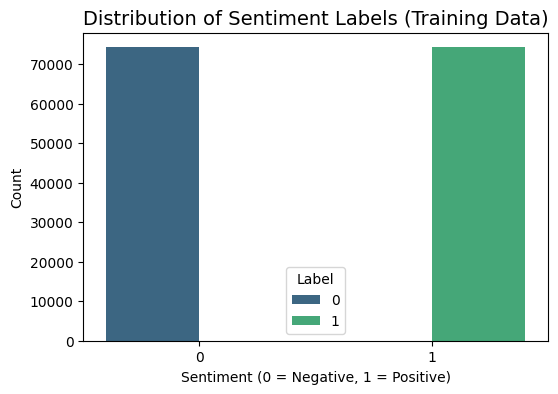

Label
1    74196
0    74192
Name: count, dtype: int64


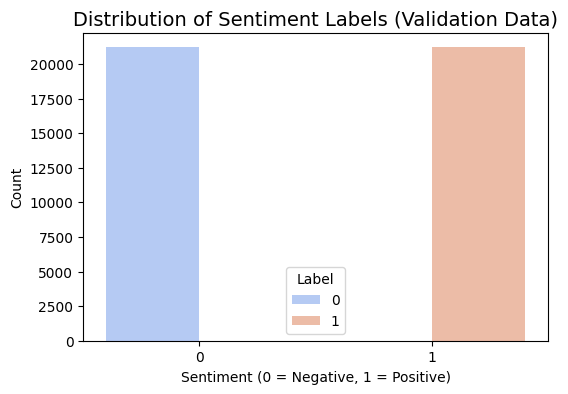

Label
1    21199
0    21197
Name: count, dtype: int64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Suppress specific warnings

# Suppress FutureWarnings from Seaborn/Pandas
warnings.simplefilter(action='ignore', category=FutureWarning)


# Plot the distribution of sentiment labels for training data
plt.figure(figsize=(6,4))
sns.countplot(x=train_df["Label"], hue=train_df["Label"], palette="viridis")
plt.title("Distribution of Sentiment Labels (Training Data)", fontsize=14)
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

# Print exact counts
print(train_df["Label"].value_counts())

# Plot the distribution of sentiment labels for validation data
plt.figure(figsize=(6,4))
sns.countplot(x=val_df["Label"], hue=val_df["Label"], palette="coolwarm")
plt.title("Distribution of Sentiment Labels (Validation Data)", fontsize=14)
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

# Print exact counts
print(val_df["Label"].value_counts())


## Plot histogram of tweet lengths for test data

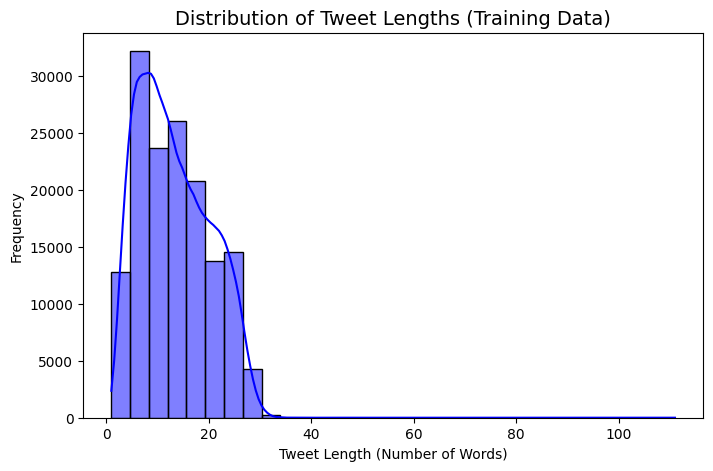

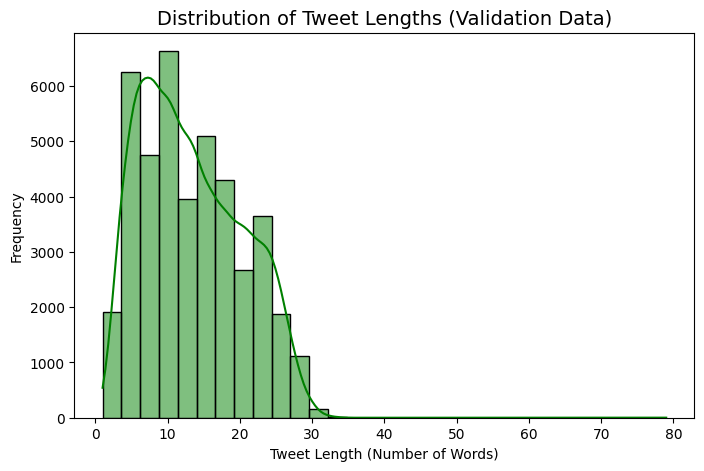

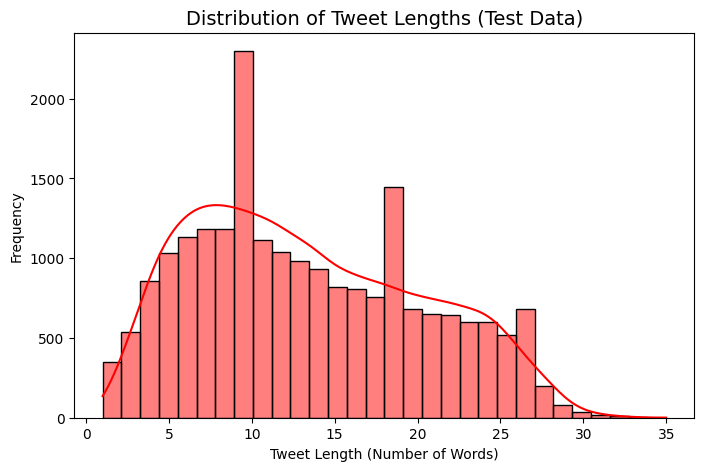

In [4]:
# Add a new column for tweet lengths (word count)
train_df["Tweet_Length"] = train_df["Text"].apply(lambda x: len(x.split()))
val_df["Tweet_Length"] = val_df["Text"].apply(lambda x: len(x.split()))
test_df["Tweet_Length"] = test_df["Text"].apply(lambda x: len(x.split()))

# Plot histogram of tweet lengths for training data
plt.figure(figsize=(8,5))
sns.histplot(train_df["Tweet_Length"], bins=30, kde=True, color="blue")
plt.title("Distribution of Tweet Lengths (Training Data)", fontsize=14)
plt.xlabel("Tweet Length (Number of Words)")
plt.ylabel("Frequency")
plt.show()

# Plot histogram of tweet lengths for validation data
plt.figure(figsize=(8,5))
sns.histplot(val_df["Tweet_Length"], bins=30, kde=True, color="green")
plt.title("Distribution of Tweet Lengths (Validation Data)", fontsize=14)
plt.xlabel("Tweet Length (Number of Words)")
plt.ylabel("Frequency")
plt.show()

# Plot histogram of tweet lengths for test data
plt.figure(figsize=(8,5))
sns.histplot(test_df["Tweet_Length"], bins=30, kde=True, color="red")
plt.title("Distribution of Tweet Lengths (Test Data)", fontsize=14)
plt.xlabel("Tweet Length (Number of Words)")
plt.ylabel("Frequency")
plt.show()


## Plot the distribution of tweet lengths by sentiment label for training data

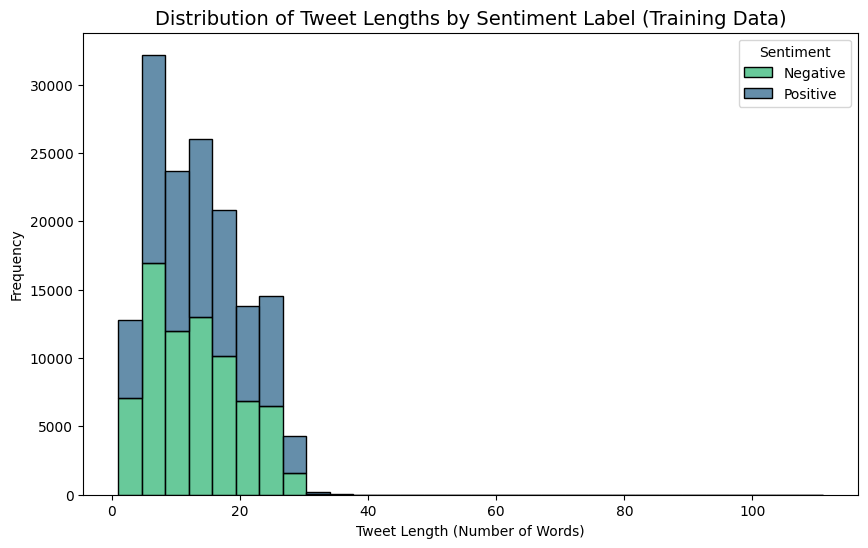

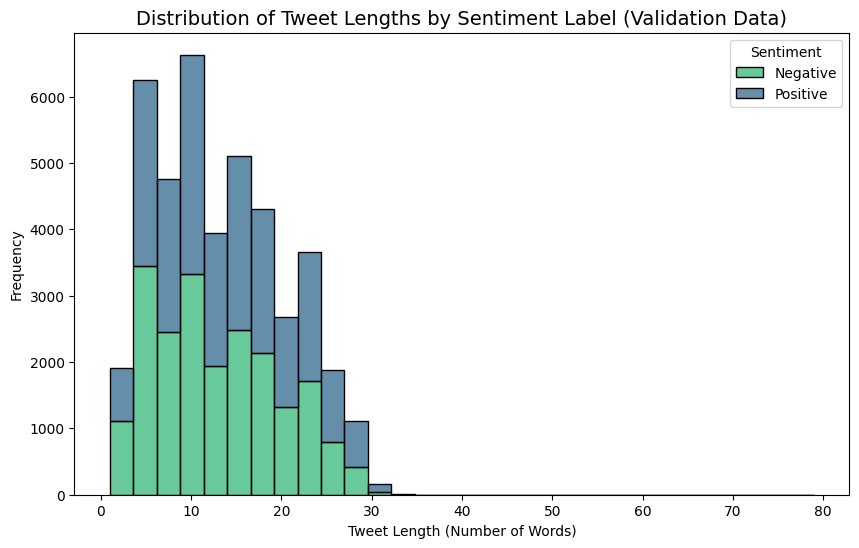

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_df, x="Tweet_Length", hue="Label", multiple="stack", bins=30, palette="viridis")
plt.title("Distribution of Tweet Lengths by Sentiment Label (Training Data)", fontsize=14)
plt.xlabel("Tweet Length (Number of Words)")
plt.ylabel("Frequency")
plt.legend(title="Sentiment", labels=["Negative", "Positive"])
plt.show()

# Plot the distribution of tweet lengths by sentiment label for validation data
plt.figure(figsize=(10,6))
sns.histplot(data=val_df, x="Tweet_Length", hue="Label", multiple="stack", bins=30, palette="viridis")
plt.title("Distribution of Tweet Lengths by Sentiment Label (Validation Data)", fontsize=14)
plt.xlabel("Tweet Length (Number of Words)")
plt.ylabel("Frequency")
plt.legend(title="Sentiment", labels=["Negative", "Positive"])
plt.show()


## Plot wordcloud for positive and negative sentiments

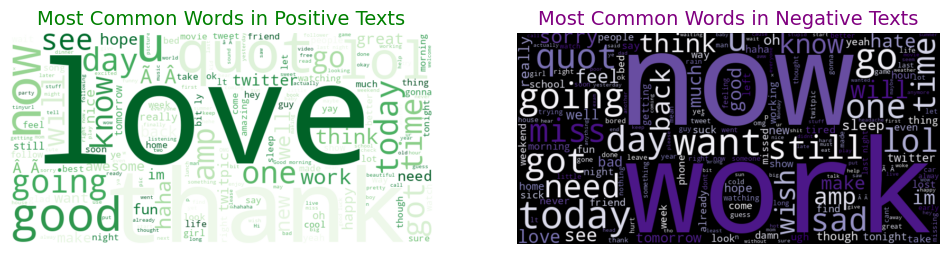

In [6]:
from wordcloud import WordCloud

# Separate positive and negative texts
negative_texts = " ".join(train_df[train_df["Label"] == 0]["Text"])
positive_texts = " ".join(train_df[train_df["Label"] == 1]["Text"])

# Generate word clouds
wordcloud_negative = WordCloud(width=800, height=400, background_color="black", colormap="Purples").generate(negative_texts)
wordcloud_positive = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_texts)

# Plot the word clouds
plt.figure(figsize=(12, 5))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Positive Texts", fontsize=14, color="Green")

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Negative Texts", fontsize=14, color="purple")


plt.show()

# Preprocessing Data

## Creation of dictionary for slang correction

In [7]:
slang_dict = {
    "4all": "for all",
    "u": "you",
    "r": "are",
    "y'all": "you all",
    "b4": "before",
    "gr8": "great",
    "l8r": "later",
    "idk": "I don't know",
    "btw": "by the way",
    "imo": "in my opinion",
    "omg": "oh my god",
    "thx": "thanks",
    "pls": "please",
    "ur": "your",
    "cuz": "because",
    "$" : "money",
    "jk" : "joking",
    "j/k" : "joking",
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "dilf" : "dad i would like to fuck",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "milf" : "mother i would like to fuck",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

## Creation of Preprocessing Algorithm

In [8]:
import nltk
import html
import re
import string
import unicodedata
from nltk.tokenize import TweetTokenizer 
!pip install contractions
from contractions import fix
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer
!pip install symspellpy
from symspellpy.symspellpy import SymSpell, Verbosity
import emoji

# Download necessary NLTK resources
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("omw-1.4")
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
# Initialize SymSpell for spell correction
sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=7)
dictionary_path = "/kaggle/input/frequency-dictionary-en-82-765/frequency_dictionary_en_82_765.txt"
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# Cache for Faster Spell Checking
correction_cache = {}

def correct_spelling(text):
    """Corrects spelling using SymSpell with lookup_compound() and caching."""
    if text in correction_cache:
        return correction_cache[text]

    suggestion = sym_spell.lookup_compound(text, max_edit_distance=3)
    corrected_text = suggestion[0].term if suggestion else text

    correction_cache[text] = corrected_text  # Store in cache
    return corrected_text

    
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Decode HTML entities
    text = html.unescape(text)

    # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

    # Remove @mentions and URLs
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Fix contractions
    text = fix(text)

    # Slang correction
    words = text.split()
    words = [slang_dict[word] if word in slang_dict else word for word in words]
    text = " ".join(words)
    
    # Remove newline characters
    text = re.sub(r"\n", " ", text)
    
    # Remove numbers
    text = re.sub(r"\d+", "", text)

    # Translate emojis to text
    text = emoji.demojize(text)
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # multiple letters are replaced by a single letter (if a letter is repeated 3 or more times)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    
    # SymSpell Correction
    text = correct_spelling(text)

    # Tokenize
    tokens = tokenizer.tokenize(text)  

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word is not None]

    return " ".join(tokens)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 8.5 MB/s eta 0:00:00
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpo

## Apply the Preprocessing algorithm to the datasets

In [9]:
# Apply text preprocessing datasets
train_df["Clean_Text"] = train_df["Text"].apply(preprocess_text)
val_df["Clean_Text"] = val_df["Text"].apply(preprocess_text)
test_df["Clean_Text"] = test_df["Text"].apply(preprocess_text)

## Show preprocessing results

In [10]:
# Display a sample of cleaned text
train_df[["Text", "Clean_Text"]].head(10)
val_df[["Text", "Clean_Text"]].head(10)
test_df[["Text", "Clean_Text"]].head(10)

,Text,Clean_Text
0,The books ARRIVED!!! Those who want a copy - w...,﻿ the book arrived those who want a copy write...
1,@Spunk_Ransom_09 alright yea its cute. I guess...,alright yea it cute i guess this prof we have ...
2,On the way to zen buffet! no crabs I think,on ﻿ the way to zen buffet no crab i think
3,Good Tuesday Morning All (5:20am)....,good tuesday morning all am
4,Bed timeee,bed time
5,German Government got squezzed out by bancrupt...,german government got squeezed out by bankrupt...
6,http://twitpic.com/6qbtt - @zachallstar @natha...,nice seeing you guy again an la show is a must...
7,@masarat i can smell it too enjoy and keep us...,i can smell it too enjoy and keep u updated
8,"Good morning everyone, Happy Fridayyyyyyy",good morning everyone happy friday
9,@katesol Teehee. Well done on your Bronze Meda...,teepee well done on your bronze medallion awesome


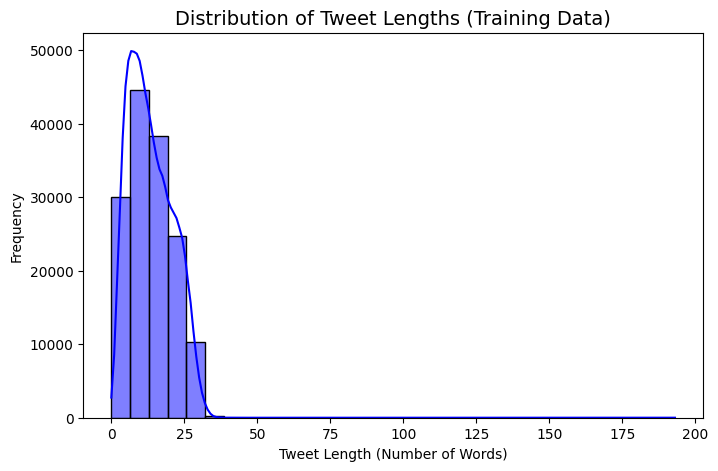

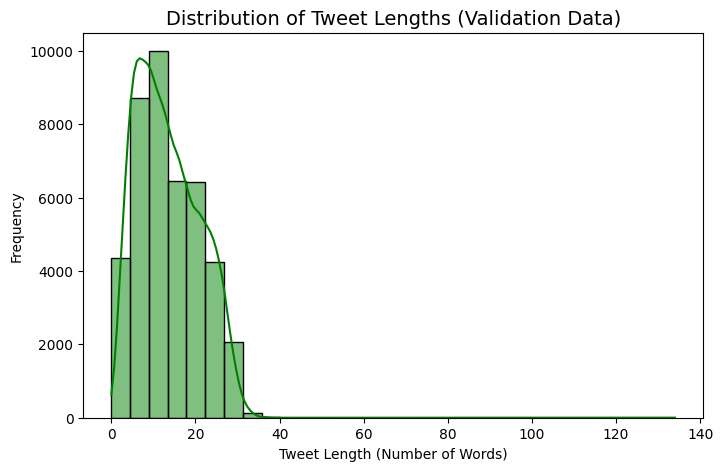

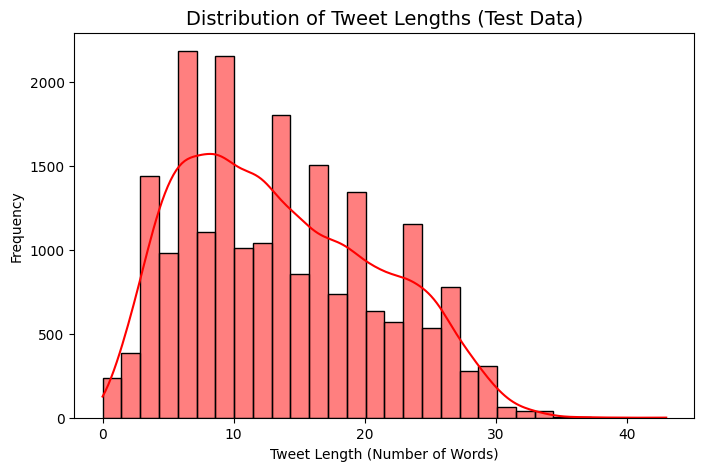

In [11]:
train_df["Tweet_Length"] = train_df["Clean_Text"].apply(lambda x: len(x.split()))
val_df["Tweet_Length"] = val_df["Clean_Text"].apply(lambda x: len(x.split()))
test_df["Tweet_Length"] = test_df["Clean_Text"].apply(lambda x: len(x.split()))

# Plot histogram of tweet lengths for training data
plt.figure(figsize=(8,5))
sns.histplot(train_df["Tweet_Length"], bins=30, kde=True, color="blue")
plt.title("Distribution of Tweet Lengths (Training Data)", fontsize=14)
plt.xlabel("Tweet Length (Number of Words)")
plt.ylabel("Frequency")
plt.show()

# Plot histogram of tweet lengths for validation data
plt.figure(figsize=(8,5))
sns.histplot(val_df["Tweet_Length"], bins=30, kde=True, color="green")
plt.title("Distribution of Tweet Lengths (Validation Data)", fontsize=14)
plt.xlabel("Tweet Length (Number of Words)")
plt.ylabel("Frequency")
plt.show()

# Plot histogram of tweet lengths for test data
plt.figure(figsize=(8,5))
sns.histplot(test_df["Tweet_Length"], bins=30, kde=True, color="red")
plt.title("Distribution of Tweet Lengths (Test Data)", fontsize=14)
plt.xlabel("Tweet Length (Number of Words)")
plt.ylabel("Frequency")
plt.show()


## Count number of unique words in each dataset

In [12]:
# Calculate unique word counts separately for each dataset
!pip install ace-tools-open
import ace_tools_open as tools

def count_words(text):
    words = set()
    for text in text:
        words.update(text.split())  # Add words to the set
    return len(words)


train_words = count_words(train_df["Clean_Text"])
val_words = count_words(val_df["Clean_Text"])
test_words = count_words(test_df["Clean_Text"])

# Display the results
word_counts = {
    "Train Dataset": train_words,
    "Validation Dataset": val_words,
    "Test Dataset": test_words
}

word_counts_df = pd.DataFrame(word_counts.items(), columns=["Dataset", "Unique Words"])
tools.display_dataframe_to_user(name="Unique Word Counts", dataframe=word_counts_df)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.4 MB/s eta 0:00:00
Unique Word Counts


# Vectorization


## Apply TF-IDF vectorization to the data

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=100000,  # Increase the number of features
    ngram_range=(1, 3),  # Use unigrams, bigrams, and trigrams
    max_df=0.87,  # Lower max_df to ignore very common words
    min_df=2,  # Lower min_df to include more rare words
    sublinear_tf=True  # Use sublinear term frequency
)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df["Clean_Text"])

# Transform the validation data (using the same vectorizer)
X_val_tfidf = tfidf_vectorizer.transform(val_df["Clean_Text"])

# Transform the test data (using the same vectorizer)
X_test_tfidf = tfidf_vectorizer.transform(test_df["Clean_Text"])


# Extract target labels
y_train = train_df["Label"]
y_val = val_df["Label"]

# Show the shape of the transformed data
X_train_tfidf.shape, X_val_tfidf.shape, X_test_tfidf.shape

((148388, 100000), (42396, 100000), (21199, 100000))

## Plot the 10 most and least important words according to their TF-IDF score

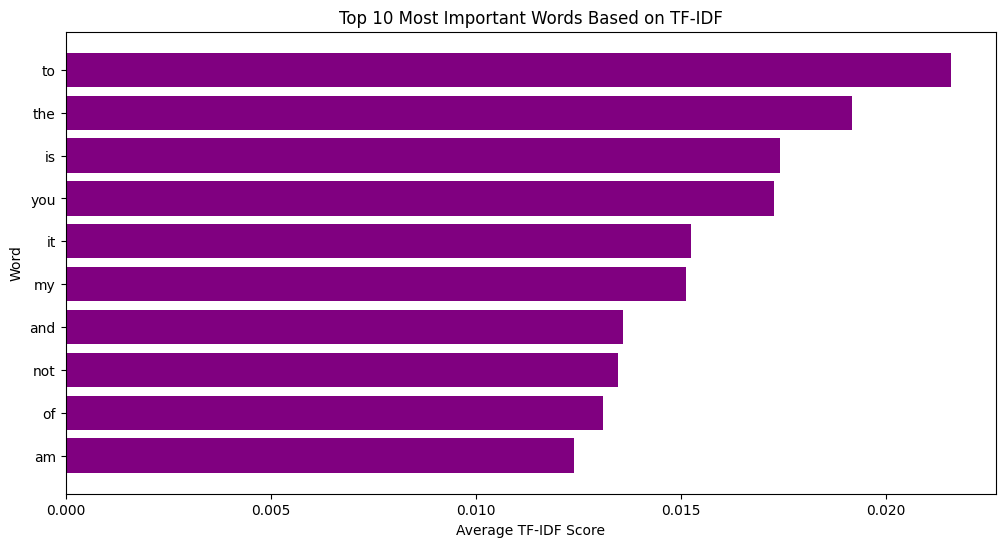

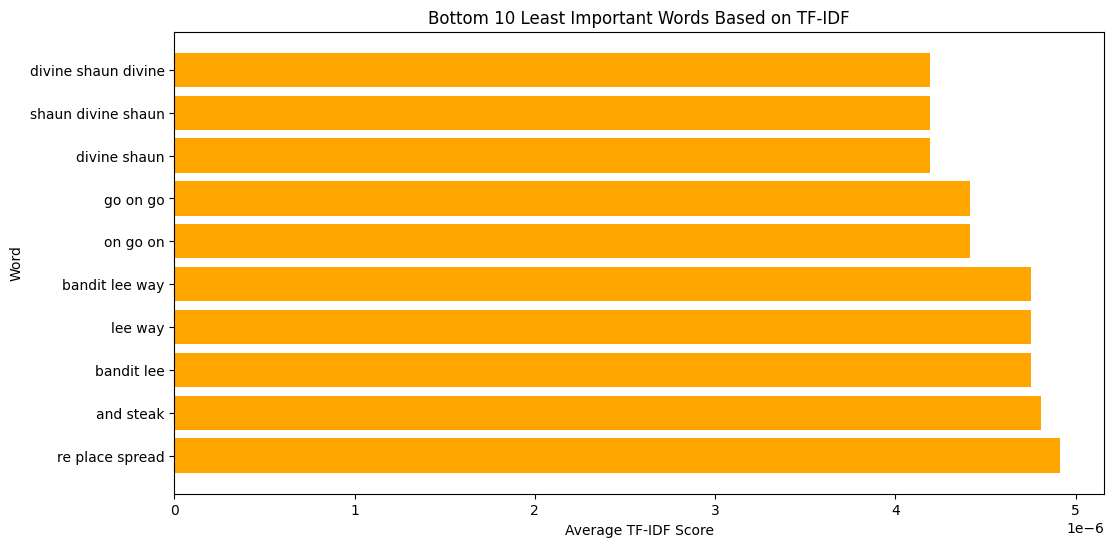

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names (words)
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Get average TF-IDF scores for each word in training set
mean_tfidf_scores = np.asarray(X_train_tfidf.mean(axis=0)).flatten()

# Get top 10 most important words
top_n = 10
top_indices = mean_tfidf_scores.argsort()[-top_n:][::-1]  # Get indices of top words

# Get bottom 10 least important words
bottom_n = 10
bottom_indices = mean_tfidf_scores.argsort()[:bottom_n]  # Get indices of bottom words

# Get top and bottom words and their scores
top_words = feature_names[top_indices]
top_scores = mean_tfidf_scores[top_indices]
bottom_words = feature_names[bottom_indices]
bottom_scores = mean_tfidf_scores[bottom_indices]

# Plot top 10 most important words
plt.figure(figsize=(12, 6))
plt.barh(top_words[::-1], top_scores[::-1], color='purple')  # Reverse for better view
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Word")
plt.title(f"Top {top_n} Most Important Words Based on TF-IDF")
plt.show()

# Plot bottom 10 least important words
plt.figure(figsize=(12, 6))
plt.barh(bottom_words[::-1], bottom_scores[::-1], color='orange')  # Reverse for better view
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Word")
plt.title(f"Bottom {bottom_n} Least Important Words Based on TF-IDF")
plt.show()


# Model Creation

## Use a grid search to find optimal hyperparameters for the model

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define hyperparameter search space
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Different optimization methods
    'max_iter': [200, 500, 1000],  # Max iterations for convergence
    'class_weight': [None, 'balanced']  # Handling class imbalance
}

# Perform Grid Search to find the best model
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Display the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'max_iter': 200, 'solver': 'liblinear'}
Best Accuracy: 0.801331610633628


## Train the model with calculated Hyperparameters

In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(C=best_params['C'], solver=best_params['solver'], max_iter=best_params['max_iter'], random_state=20)
# Train the model
log_reg_model.fit(X_train_tfidf, y_train)


LogisticRegression(C=1, max_iter=200, random_state=20, solver='liblinear')

## Evaluate model performance

Accuracy: 0.804793
Precision: 0.801841
Recall: 0.809708
F1 Score: 0.805755
ROC AUC: 0.885202


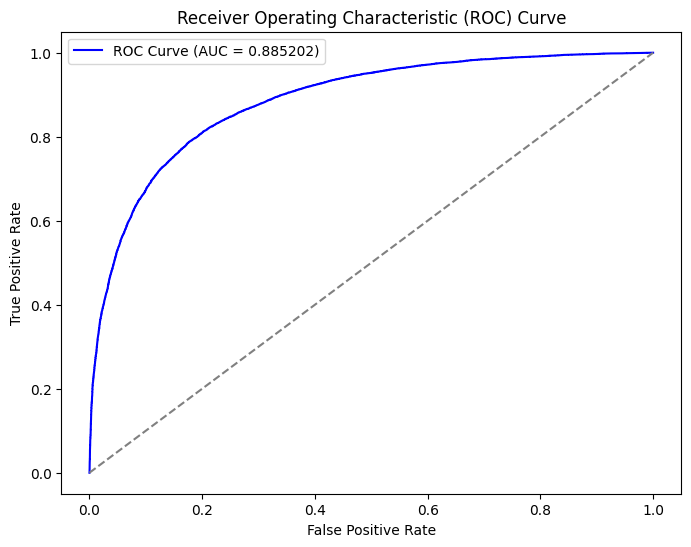

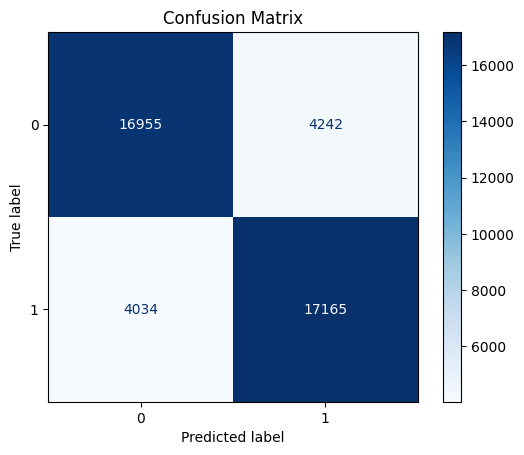

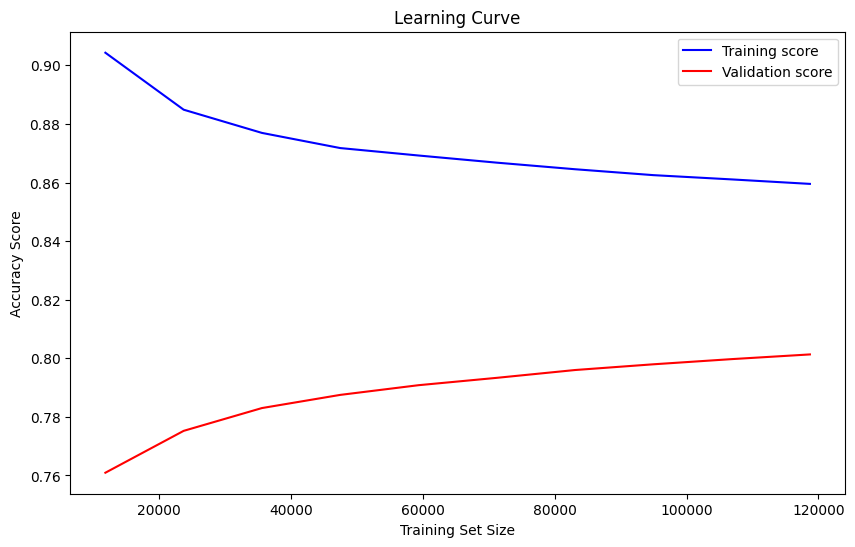

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , roc_curve
# Predict on validation set
y_val_pred = log_reg_model.predict(X_val_tfidf)
y_val_pred_proba = log_reg_model.predict_proba(X_val_tfidf)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_proba)

# Print the results
print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")
print(f"ROC AUC: {roc_auc:.6f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.6f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot learning curve
train_sizes, train_scores, val_scores = learning_curve(log_reg_model, X_train_tfidf, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation score', color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Calculate Under/Overfitting

In [18]:
# Evaluate the model on the training set
y_train_pred = log_reg_model.predict(X_train_tfidf)
y_train_pred_proba = log_reg_model.predict_proba(X_train_tfidf)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)

# Compare training and validation performance
print("\nPerformance Comparison:")
print(f"Accuracy Difference: {train_accuracy - accuracy:.6f}")
print(f"Precision Difference: {train_precision - precision:.6f}")
print(f"Recall Difference: {train_recall - recall:.6f}")
print(f"F1 Score Difference: {train_f1 - f1:.6f}")
print(f"ROC AUC Difference: {train_roc_auc - roc_auc:.6f}")


Performance Comparison:
Accuracy Difference: 0.052446
Precision Difference: 0.052224
Recall Difference: 0.052023
F1 Score Difference: 0.052126
ROC AUC Difference: 0.046524


## Create prediction of the test data

In [19]:
# Predict on test set
y_test_pred = log_reg_model.predict(X_test_tfidf)

# Create a DataFrame for the submission
submission_df = pd.DataFrame({
  "ID": test_df["ID"],
  "Label": y_test_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv("submission.csv", index=False)